In [1]:
import category_encoders as ce
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

## Encoding Using Python Functions

###  ordinal encoding

[The function ordinal_encoder takes three arguments:](#)<br>
data: A list of dictionaries where each dictionary represents a row of data.

column_name: The key (column) in the dictionaries for which you want to perform the ordinal encoding.
                                                 
mapping: A dictionary that maps category values to corresponding ordinal values.


[List Comprehension:](#)<br>
This is a list comprehension that creates a new list of dictionaries by iterating over each dictionary (row) in data.
For each row, it creates a new dictionary using {**row, column_name: ...}

[Example Data:](#)<br>
train_data is a list of dictionaries where each dictionary represents a data point with a 'Degree' key and a
corresponding value (e.g., 'High school', 'Masters', etc.).

[Mapping for Degrees:](#)<br>
degree_mapping is a dictionary that maps different educational degrees to ordinal values. For example, 'High school' is
mapped to 1, and 'Phd' is mapped to 5.

[Applying the Encoder:](#)<br>
This calls the ordinal_encoder function, passing:
train_data as the data to be encoded,
'Degree' as the column to be encoded, and
degree_mapping as the mapping to use for encoding.
The result, encoded_data, will be the list of dictionaries where the 'Degree' values have been replaced by their 
    corresponding ordinal values based on the mapping.

In [2]:
def ordinal_encoder(data, column_name, mapping):
    return [{**row, column_name: mapping.get(row[column_name], -1)} for row in data]

train_data = [
    {'Degree': 'High school'}, {'Degree': 'Masters'}, {'Degree': 'Diploma'},
    {'Degree': 'Bachelors'}, {'Degree': 'Bachelors'}, {'Degree': 'Masters'},
    {'Degree': 'Phd'}, {'Degree': 'High school'}, {'Degree': 'High school'}
]

degree_mapping = {'None': 0, 'High school': 1, 'Diploma': 2, 
                  'Bachelors': 3, 'Masters': 4, 'Phd': 5}

encoded_data = ordinal_encoder(train_data, 'Degree', degree_mapping)

#  results
print("Original Data:")
print(train_data)

print("\nEncoded Data:")
print(encoded_data)



Original Data:
[{'Degree': 'High school'}, {'Degree': 'Masters'}, {'Degree': 'Diploma'}, {'Degree': 'Bachelors'}, {'Degree': 'Bachelors'}, {'Degree': 'Masters'}, {'Degree': 'Phd'}, {'Degree': 'High school'}, {'Degree': 'High school'}]

Encoded Data:
[{'Degree': 1}, {'Degree': 4}, {'Degree': 2}, {'Degree': 3}, {'Degree': 3}, {'Degree': 4}, {'Degree': 5}, {'Degree': 1}, {'Degree': 1}]


###   One-Hot Encoding

In [10]:


# Create the DataFrame
data = pd.DataFrame({'City': ['Delhi', 'Mumbai', 'Hydrabad', 'Chennai', 'Bangalore', 'Delhi', 'Hydrabad', 'Bangalore', 'Delhi']})

# Function for one-hot encoding
def one_hot_encoder(data, column):
    encoded_data = pd.get_dummies(data, columns=[column], drop_first=False)
    return encoded_data

# Apply one-hot encoding
encoded_data = one_hot_encoder(data, 'City')

# Convert the encoded data to integers
encoded_data = encoded_data.astype(int)

print("Data-:\n",data)
# Display the one-hot encoded data
print("\n\n Display the one-hot encoded data:-\n\n",encoded_data)



Data-:
         City
0      Delhi
1     Mumbai
2   Hydrabad
3    Chennai
4  Bangalore
5      Delhi
6   Hydrabad
7  Bangalore
8      Delhi


 Display the one-hot encoded data:-

    City_Bangalore  City_Chennai  City_Delhi  City_Hydrabad  City_Mumbai
0               0             0           1              0            0
1               0             0           0              0            1
2               0             0           0              1            0
3               0             1           0              0            0
4               1             0           0              0            0
5               0             0           1              0            0
6               0             0           0              1            0
7               1             0           0              0            0
8               0             0           1              0            0


<br>This code one-hot encodes the City column, where each unique city becomes its own column, and the rows indicate the presence of that city.

### Dummy Encoding

A DataFrame data is created with a single column 'City', which contains names of cities.

In [14]:

# Function for dummy encoding
def one_hot_encode(data, column, drop_first=True):
    # Get unique sorted values from the column
    unique_values = sorted(set(data[column]))
    print("\n\nUnique values (sorted):\n", unique_values) 

    # Generate a dictionary for encoding
    encoded_data = {
        f"{column}_{value}": [x == value for x in data[column]] 
        for idx, value in enumerate(unique_values) if not (drop_first and idx == 0)
    }
    print("\n\nEncoded data:\n", encoded_data)  # Debug line

    # Return the concatenated DataFrame with original data (without the 'column') and encoded columns
    return pd.concat([data.drop(columns=[column]), pd.DataFrame(encoded_data)], axis=1)


# Create a DataFrame
data = pd.DataFrame({'City': ['Delhi', 'Mumbai', 'Hyderabad', 'Chennai', 'Bangalore', 'Delhi', 'Hyderabad']})

# Apply encoding
data_encoded = one_hot_encode(data, 'City', drop_first=True)

# Display the result
print("\n\nOriginal Data:\n", data)
print("\n\nEncoded Data:\n", data_encoded)





Unique values (sorted):
 ['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Mumbai']


Encoded data:
 {'City_Chennai': [False, False, False, True, False, False, False], 'City_Delhi': [True, False, False, False, False, True, False], 'City_Hyderabad': [False, False, True, False, False, False, True], 'City_Mumbai': [False, True, False, False, False, False, False]}


Original Data:
         City
0      Delhi
1     Mumbai
2  Hyderabad
3    Chennai
4  Bangalore
5      Delhi
6  Hyderabad


Encoded Data:
    City_Chennai  City_Delhi  City_Hyderabad  City_Mumbai
0         False        True           False        False
1         False       False           False         True
2         False       False            True        False
3          True       False           False        False
4         False       False           False        False
5         False        True           False        False
6         False       False            True        False


This code performs dummy encoding on the 'City' column of a DataFrame, converting categorical values (city names) into binary columns (0s and 1s). Here's a simplified explanation:<br>

[1 Unique Values:](#) The code first extracts and sorts the unique city names.

[2 Create Dummy Columns:](#) It creates new columns, one for each city, where the values are 1 if the city matches the row's original city, otherwise 0.

[3 Drop the First City (optional): ](#)If drop_first=True, the first city is not encoded to avoid redundancy (useful for models like regression).

[4 Concatenate Result:](#) The original 'City' column is replaced with the new dummy columns in the DataFrame.

### Hash Encoder

[Hash Encoder Explanation](#)<br>
A hash encoder is a technique used to encode categorical variables into a numerical format using hashing functions.
This method transforms each category (in your case, the 'Month' column) into a fixed-length array of 0s and 1s (binary format). 
The encoding is based on a hash function, which maps a category to a unique binary pattern

In [16]:

# Sample data
data = pd.DataFrame({
    'Month': ['January', 'April', 'March', 'April', 'February', 'June', 'July', 'June', 'September']
})

# Hash encoder function
def hash_encoder(data, column, n_components):
    # Define an inner function to hash each value and convert it into a binary vector
    def hash_value(value, n):
        # The function will create a list of binary values where the hash of each value is modded by n
        return [1 if (hash(value) + i) % n == 0 else 0 for i in range(n)]

    # Generate the hash-encoded DataFrame
    encoded_data = pd.DataFrame(
        [hash_value(value, n_components) for value in data[column]],  # Apply hash_value to each element in the column
        columns=[f"{column}_hash_{i}" for i in range(n_components)]  # Name the columns as Month_hash_0, Month_hash_1, etc.
    )
    
    # Return the concatenated DataFrame with the original data (without the 'Month' column)
    return pd.concat([data, encoded_data], axis=1).drop(columns=[column])


# Encode the data
encoded_data = hash_encoder(data, 'Month', 6)

# Display the original and encoded data
print("Original Data:\n", data)
print("\nEncoded Data:\n", encoded_data)


Original Data:
        Month
0    January
1      April
2      March
3      April
4   February
5       June
6       July
7       June
8  September

Encoded Data:
    Month_hash_0  Month_hash_1  Month_hash_2  Month_hash_3  Month_hash_4  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             0             0             0             0   
3             0             0             0             0             1   
4             0             0             1             0             0   
5             1             0             0             0             0   
6             0             0             0             0             1   
7             1             0             0             0             0   
8             1             0             0             0             0   

   Month_hash_5  
0             1  
1             0  
2             1  
3             0

[Explanation of the Output:](#)<br>
Each row in the 'Month' column is hashed and converted into a binary vector of length 6 (because we passed n_components=6).<br>
The column names now reflect the encoding: Month_hash_0, Month_hash_1, etc.<br>
Each month is assigned a unique binary vector based on its hash value and the number of components (6 in this case).<br>

### Target Encoding

[Target Encoding Explanation](#)<br>
Target Encoding is a technique used to encode categorical variables based on the target variable (i.e., the dependent variable).
It replaces the categorical values with the mean (or another statistic) of the target variable for each category.
This approach is often used in regression and classification tasks to provide more meaningful numeric values for categorical features.
<br>
In the given example, you want to encode the class column based on the mean of the Marks column for each class.

In [17]:
data = [
    {'class': 'A', 'Marks': 50},
    {'class': 'B', 'Marks': 30},
    {'class': 'C', 'Marks': 70},
    {'class': 'B', 'Marks': 80},
    {'class': 'C', 'Marks': 45},
    {'class': 'A', 'Marks': 97},
    {'class': 'A', 'Marks': 80},
    {'class': 'A', 'Marks': 68}
]
def target_encoder(data, target_col, encode_col):
    #  Calculate the mean of the target variable ('Marks') for each unique value in the 'class' column
    class_means = {
        cls: sum(row[target_col] for row in data if row[encode_col] == cls) / 
             sum(1 for row in data if row[encode_col] == cls) 
        for cls in set(row[encode_col] for row in data)
    }

    #  Assign the mean value to each row based on its 'class'
    for row in data:
        row['class_encoded'] = class_means[row[encode_col]]
    
    return data

encoded_data = target_encoder(data, 'Marks', 'class')


# Display the Result
for row in encoded_data:
    print(row)

{'class': 'A', 'Marks': 50, 'class_encoded': 73.75}
{'class': 'B', 'Marks': 30, 'class_encoded': 55.0}
{'class': 'C', 'Marks': 70, 'class_encoded': 57.5}
{'class': 'B', 'Marks': 80, 'class_encoded': 55.0}
{'class': 'C', 'Marks': 45, 'class_encoded': 57.5}
{'class': 'A', 'Marks': 97, 'class_encoded': 73.75}
{'class': 'A', 'Marks': 80, 'class_encoded': 73.75}
{'class': 'A', 'Marks': 68, 'class_encoded': 73.75}


[Explanation of the Output:](#)<br>
[Class A:](#)<br>
Mean of Marks: (50 + 97 + 80 + 68) / 4 = 73.75
All rows where class == 'A' have 'class_encoded': 73.75.

[Class B:](#)<br>
Mean of Marks: (30 + 80) / 2 = 55.0
All rows where class == 'B' have 'class_encoded': 55.0.

[Class C:](#)<br>
Mean of Marks: (70 + 45) / 2 = 57.5
All rows where class == 'C' have 'class_encoded': 57.5.

 #  Feature Scaling Using Python Function

## MinMax scaling

[Feature Scaling using Min-Max Scaling](#)<br>
Min-Max Scaling is a feature scaling technique where values of numerical features are transformed to a specific range,
typically between 0 and 1. The formula for Min-Max scaling is:

        𝑋scaled = 𝑋−min(𝑋)/max(𝑋)−min(𝑋) 

[Code Explanation](#)<br>
Here, you've implemented a custom function for Min-Max Scaling that takes a dataset and the columns to scale, applies the Min-Max transformation, and returns the scaled data.

[Key Steps in the Code](#)<br>
[1 Calculate Min and Max Values for Each Column:](#)<br>
You loop through each column in the columns list and compute the minimum and maximum values, storing them in a dictionary column_stats.

[2 Apply Min-Max Scaling:](#)<br>
For each row of the data, the values in the specified columns are scaled using the formula:

            scaled_value=value−min_val / max_val−min_val

If the minimum and maximum values are the same (i.e., no variation), you set the scaled value to 0 to avoid division by zero.

[3 Handle Missing or None Values:](#)<br>
If the value for a column is missing (i.e., None), it is replaced with 0 during the scaling process.

[4 Convert the Data Back to a DataFrame:](#)<br>
After scaling, the scaled data is converted back into a DataFrame (scaled_df).

In [23]:
import pandas as pd
import time

def min_max_scaler(data, columns):
    column_stats = {}
    
    # Step 1: Calculate min and max for each column
    for col in columns:
        col_values = [row[col] if row[col] is not None else 0 for row in data]  
        column_stats[col] = {'min': min(col_values), 'max': max(col_values)}
        
    scaled_data = []
    
    # Step 2: Apply scaling for each row
    for row in data:
        scaled_row = row.copy()
        for col in columns:
            min_val = column_stats[col]['min']
            max_val = column_stats[col]['max']
            value = row[col] if row[col] is not None else 0  
            
            # Perform Min-Max scaling
            if max_val != min_val:  
                scaled_row[col] = (value - min_val) / (max_val - min_val)
            else:
                scaled_row[col] = 0  # If all values are the same, set to 0
        scaled_data.append(scaled_row)
    
    return scaled_data

# Load dataset from CSV file
df = pd.read_csv("C:\\Users\\admin\\Desktop\\New folder\\Encoding-and-Feature-Scaling-Using-Python-Functions\\train.csv", usecols=["Age", "Fare"])


# Convert DataFrame to list of dictionaries for processing
data_list = df.to_dict(orient='records')

# Define the columns to be scaled
columns_to_scale = ['Age', 'Fare']

# Measure the time taken for Min-Max scaling
start_time = time.time()
scaled_data = min_max_scaler(data_list, columns_to_scale)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Time taken for Min-Max scaling: {elapsed_time:.6f} seconds")

# Convert scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data)

# Display the first few rows of scaled data
print("\nScaled Data:")
print(scaled_df.head())


Time taken for Min-Max scaling: 0.000622 seconds

Scaled Data:
        Age      Fare
0  0.271174  0.014151
1  0.472229  0.139136
2  0.321438  0.015469
3  0.434531  0.103644
4  0.434531  0.015713


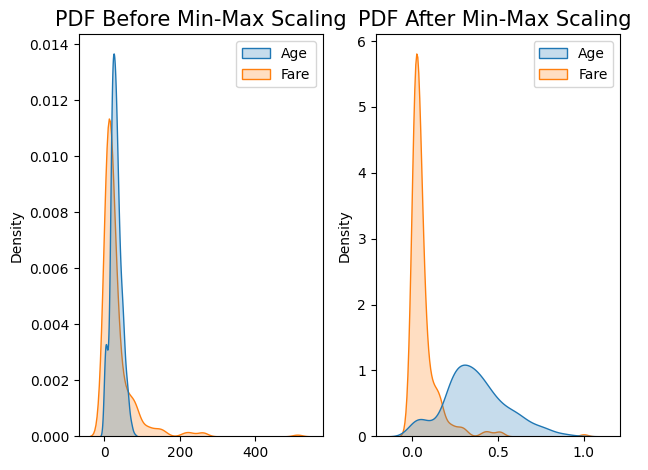

In [26]:
plt.subplot(1, 2, 1)
plt.title("PDF Before Min-Max Scaling", fontsize=15)
sns.kdeplot(data=df, color="blue", fill=True)
plt.subplot(1, 2, 2)

plt.title("PDF After Min-Max Scaling ", fontsize=15)
sns.kdeplot(data=scaled_df, color="red", fill=True)
plt.tight_layout()
plt.show()

 ## Max Absolute Scaling

In [34]:
def max_abs_scaler(data, columns):
    column_stats = {}
    for col in columns:
        col_values = [abs(row[col]) if row[col] is not None else 0 for row in data]  
        column_stats[col] = {'max_abs': max(col_values)}   # Find max absolute value for each column
    
    # Apply MaxAbs scaling
    scaled_data = []
    for row in data:
        scaled_row = row.copy()
        for col in columns:
            max_abs = column_stats[col]['max_abs']
            value = row[col] if row[col] is not None else 0  
            # Perform MaxAbs scaling
            if max_abs != 0:  
                scaled_row[col] = value / max_abs
            else:
                scaled_row[col] = 0   # Handle case where max_abs is 0
        scaled_data.append(scaled_row)
    
    return scaled_data
df = pd.read_csv("C:\\Users\\admin\\Desktop\\New folder\\Encoding-and-Feature-Scaling-Using-Python-Functions\\train.csv", usecols=["Age", "Fare"])

# Convert DataFrame to list of dictionaries for processing
data_list = df.to_dict(orient='records')

columns_to_scale = ['Age', 'Fare']

# Perform MaxAbs Scaling
start_time = time.time()
scaled_data = max_abs_scaler(data_list, columns_to_scale)
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time
print(f"Time taken for Max Absolute Scaling: {elapsed_time:.6f} seconds")

# Convert scaled data back to DataFrame for display
scaled_df = pd.DataFrame(scaled_data)

# Display the first few rows of scaled data
print("\nScaled Data:")
print(scaled_df.head())


Time taken for Max Absolute Scaling: 0.000999 seconds

Scaled Data:
      Age      Fare
0  0.2750  0.014151
1  0.4750  0.139136
2  0.3250  0.015469
3  0.4375  0.103644
4  0.4375  0.015713


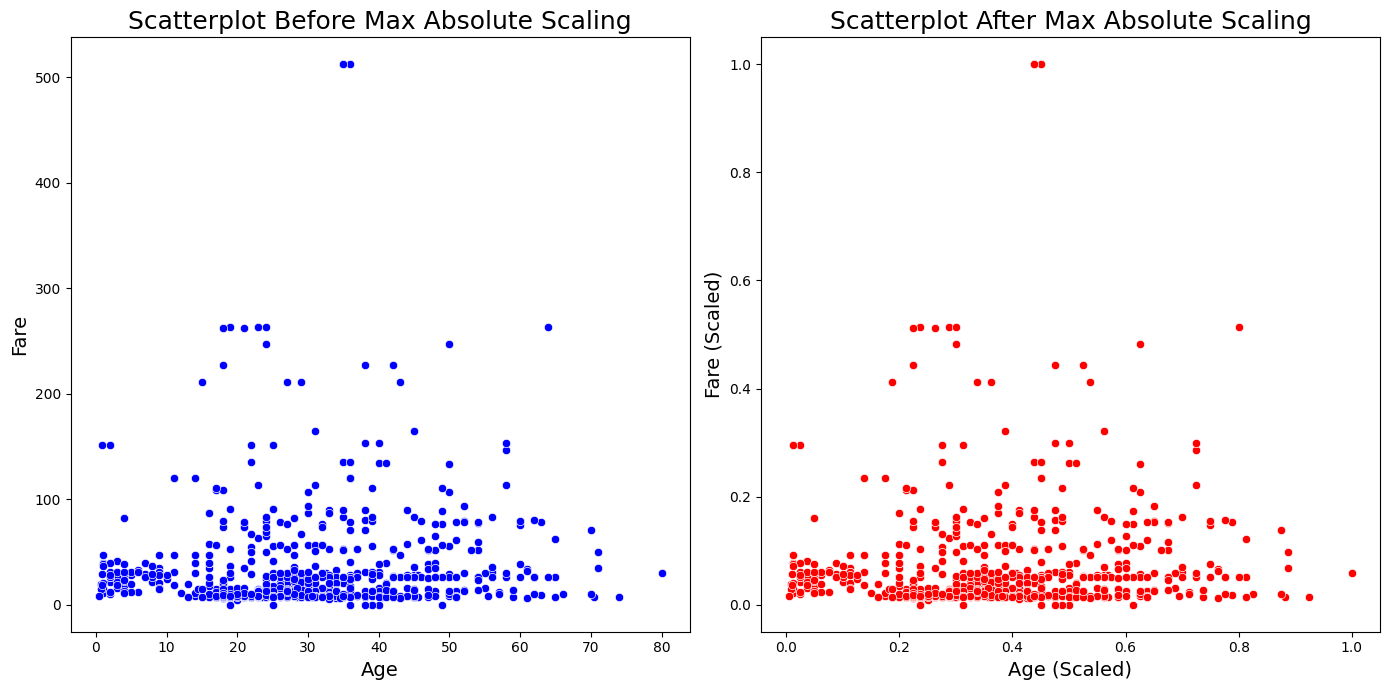

In [36]:


# Plotting before and after scaling
plt.figure(figsize=(14, 7))

# Scatterplot before scaling
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.title("Scatterplot Before Max Absolute Scaling", fontsize=18)
sns.scatterplot(x=df['Age'], y=df['Fare'], color="blue")
plt.xlabel('Age', fontsize=14)
plt.ylabel('Fare', fontsize=14)

# Scatterplot after scaling
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.title("Scatterplot After Max Absolute Scaling", fontsize=18)
sns.scatterplot(x=scaled_df['Age'], y=scaled_df['Fare'], color="red")
plt.xlabel('Age (Scaled)', fontsize=14)
plt.ylabel('Fare (Scaled)', fontsize=14)

# Adjust layout for better spacing between plots
plt.tight_layout()

# Display the plots
plt.show()


##  Robust Scaling

[Explanation of Robust Scaling](#)<br>
Robust Scaling is a technique to scale data in a way that is resilient to outliers. Instead of using the mean and standard deviation (like in Standard Scaling), Robust Scaling uses median and Interquartile Range (IQR), making it more robust when outliers are present in the data.

[The formula for robust scaling is:](#)<br>

                𝑋𝑠𝑐𝑎𝑙𝑒𝑑=𝑋−median/IQRX
 
[Where:](#)<br>
X is the original value.<br>
Median is the middle value of the data.<br>
IQR (Interquartile Range) is the range between the first quartile (Q1) and third quartile (Q3), which captures the central 50% of the data, minimizing the impact of outliers.

In [39]:
def robust_scaler(data, columns):
    column_stats = {}
    
     # Calculate Median and IQR for Each Column
    for col in columns:
        col_values = [row[col] if row[col] is not None else 0 for row in data]  
        median = sorted(col_values)[len(col_values)//2]  
        sorted_values = sorted(col_values)
        q1 = sorted_values[len(col_values)//4]  
        q3 = sorted_values[(3*len(col_values))//4]  
        iqr = q3 - q1 
        column_stats[col] = {'median': median, 'iqr': iqr}

   # Apply Robust Scaling
    scaled_data = []
    for row in data:
        scaled_row = row.copy()
        for col in columns:
            median = column_stats[col]['median']
            iqr = column_stats[col]['iqr']
            value = row[col] if row[col] is not None else 0  

            if iqr != 0: 
                scaled_row[col] = (value - median) / iqr
            else:
                scaled_row[col] = 0  
        scaled_data.append(scaled_row)
    
    return scaled_data

# Read Data and Use the Scaler
df = pd.read_csv("C:\\Users\\admin\\Desktop\\New folder\\Encoding-and-Feature-Scaling-Using-Python-Functions\\train.csv", usecols=["Age", "Fare"])
data_list = df.to_dict(orient='records')

columns_to_scale = ['Age', 'Fare']

# Measure Execution Time
# The execution time for the scaling process is measured using time.time() and printed.

start_time = time.time()
scaled_data = robust_scaler(data_list, columns_to_scale)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Time taken for Robust Scaling: {elapsed_time:.6f} seconds")

 # Convert Scaled Data Back to DataFrame(The scaled data, which is in the form of a list of dictionaries, 
#                                          is converted back to a pandas DataFrame for easier handling and further analysis.)
scaled_df = pd.DataFrame(scaled_data)


Time taken for Robust Scaling: 0.001000 seconds

Scaled Data:
   Age      Fare
0  NaN -0.311813
1  NaN  2.459687
2  NaN -0.282598
3  NaN  1.672674
4  NaN -0.277188



[1. Function Definition:](#)<br>
    The function robust_scaler takes two arguments:<br>
    
        data: A list of dictionaries where each dictionary represents a row of data.<br>
        
        columns: A list of columns that you want to scale using Robust Scaling.<br>
        
[2. Calculate Median and IQR for Each Column:](#)<br>

    col_values: Collects the values for the column (handles missing values by using 0).<br>
    
    median: Calculates the median of the column by sorting the values and taking the middle value (len(col_values)//2).<br>
    
    q1: The 1st quartile (25th percentile), found by taking the value at the index len(col_values)//4.<br>
    
    q3: The 3rd quartile (75th percentile), found by taking the value at the index (3*len(col_values))//4.<br>
    
    iqr: Interquartile range, which is the difference between the 3rd and 1st quartile (iqr = q3 - q1).<br>
    
    The statistics for each column (median and IQR) are stored in the column_stats dictionary.<br>

[3. Apply Robust Scaling to the Data:](#)<br>

    For each row in the data:
    
        scaled_row: A copy of the row is made to store the scaled values.<br>
        
        For each column:<br>
        
            median and iqr: Retrieved from column_stats.<br>
            
            value: Gets the value of the column, using 0 for missing values.<br>   
            
            Scaling: The value is scaled using the formula:<br> 
            
                scaled_value=value−median/iqr
                
            If iqr is 0, meaning all values are the same, the scaled value is set to 0.<br>
        The scaled rows are appended to scaled_data.

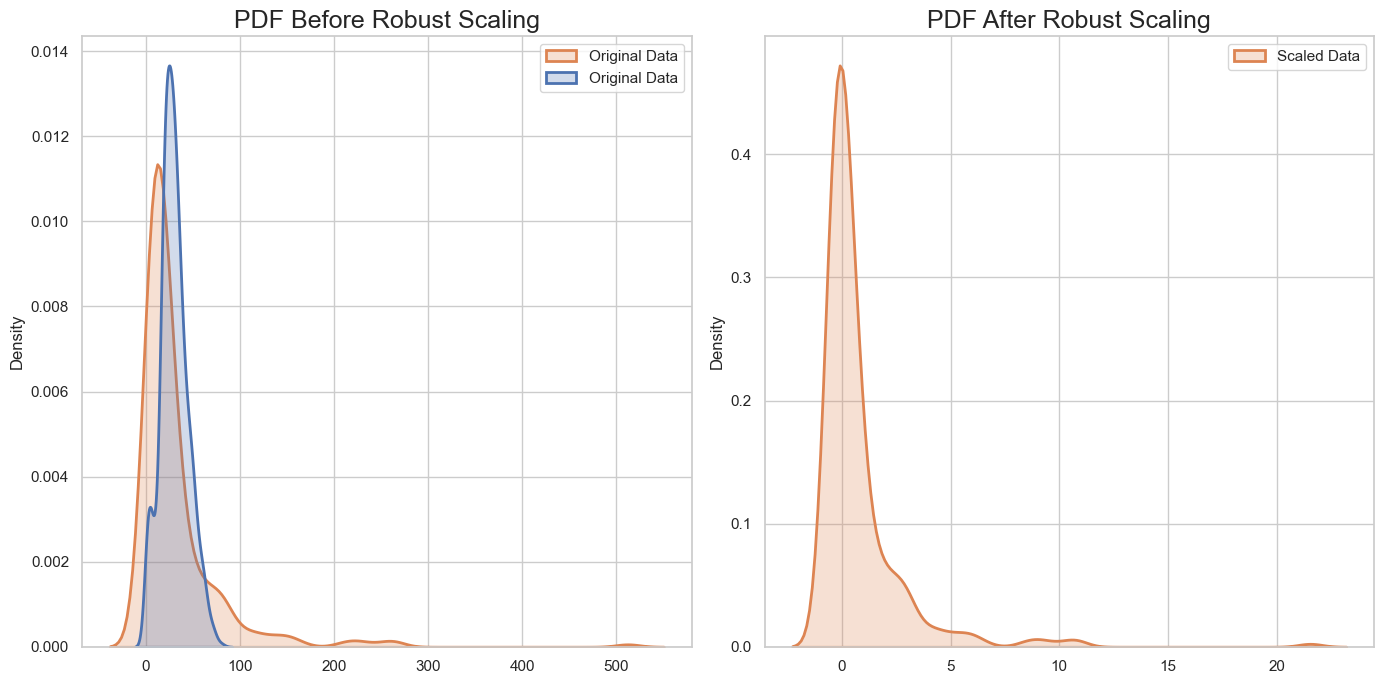

In [40]:
# . Setting the Style for the Plot
sns.set(style="whitegrid")
# Creating a Figure and Subplots
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
# Original Data - Probability Density Function (PDF)
plt.title("PDF Before Robust Scaling", fontsize=18)
sns.kdeplot(data=df, color="blue", shade=True, linewidth=2, label="Original Data")  
plt.legend()
 # Scaled Data - Probability Density Function (PDF)
plt.subplot(1, 2, 2)
plt.title("PDF After Robust Scaling", fontsize=18)
sns.kdeplot(data=scaled_df, color="red", shade=True, linewidth=2, label="Scaled Data")  
plt.legend()
# Tight Layout and Show
plt.tight_layout()
plt.show()


[Visual Outcome](#)<br>
The first plot will show the original data distribution for Age and Fare.<br>
The second plot will show the distribution of the scaled data after applying Robust Scaling.<br>
By comparing the two plots, you can observe how the scaling affects the distribution, particularly around the median, while making the data less influenced by outlier

## Standardization Scaling

[Explanation of Standardization Scaling Code:](#)<br>
This code applies Standardization Scaling (also known as Z-score normalization) to the columns in a dataset. Standardization transforms the data so that the distribution has a mean of 0 and a standard deviation of 1, making it easier for models to process data with different ranges.

[1. Calculate the Mean and Standard Deviation](#)<br>

[col_values:](#)<br> This extracts values from each specified column. If a value is None, it's replaced with 0.

[mean:](#)<br> The arithmetic mean (average) of all values in the column.

[std_dev:](#)<br> The standard deviation of the column, which measures the spread of the data around the mean. It's calculated using the formula:
    where x is each value in the column and n is the total number of values.

The mean and standard deviation are stored in a dictionary (column_stats) for each column.


[2. Standardize the Data](#)<br>

[Iterate over each row:](#)<br> For each row in the dataset, a copy is made so the original data is not modified.

[Standardization formula:](#)<br>
                    𝑧=(𝑥−𝜇)/𝜎
                    
            where:
            x is the original value
            \mu (mean) and \sigma (standard deviation) are pre-calculated for each column
            The result z is the standardized value.
            
[.](#)<br>If the standard deviation (std_dev) is 0 (i.e., all values in the column are identical), the standardized value is set to 0.


In [41]:
# 1. Calculate the Mean and Standard Deviation
def standardize(data, columns):
    column_stats = {}
    for col in columns:
        col_values = [row[col] if row[col] is not None else 0 for row in data]
        mean = sum(col_values) / len(col_values) 
        std_dev = (sum((x - mean) ** 2 for x in col_values) / len(col_values)) ** 0.5  
        column_stats[col] = {'mean': mean, 'std_dev': std_dev}
   
    # 2. Standardize the Data
    standardized_data = []
    for row in data:
        standardized_row = row.copy()
        for col in columns:
            mean = column_stats[col]['mean']
            std_dev = column_stats[col]['std_dev']
            value = row[col] if row[col] is not None else 0 
    
            standardized_row[col] = (value - mean) / std_dev if std_dev != 0 else 0
        standardized_data.append(standardized_row)
    
    return standardized_data

# 3. Load the Dataset
df = pd.read_csv("C:\\Users\\admin\\Desktop\\New folder\\Encoding-and-Feature-Scaling-Using-Python-Functions\\train.csv", usecols=["Age", "Fare"])
data_list = df.to_dict(orient='records')

# 4. Standardize the Specified Columns
columns_to_standardize = ['Age', 'Fare']
start_time = time.time()
standardized_data = standardize(data_list, columns_to_standardize)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Time taken for Standardization: {elapsed_time:.6f} seconds")

# 5. Convert the Standardized Data to a DataFrame
standardized_df = pd.DataFrame(standardized_data)

Time taken for Standardization: 0.000999 seconds


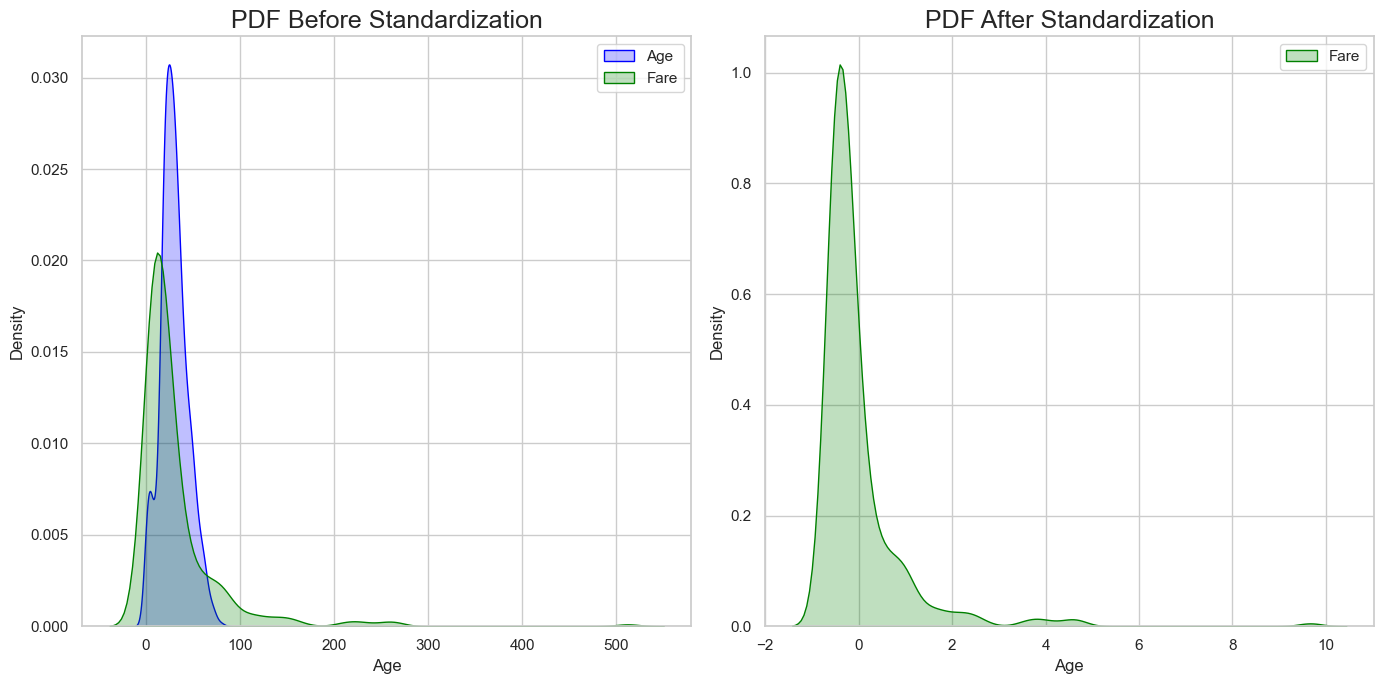

In [42]:
plt.figure(figsize=(14,7))
#Before Standardization
plt.subplot(1, 2, 1)
plt.title("PDF Before Standardization", fontsize=18)
sns.kdeplot(df['Age'], color="blue", shade=True, label="Age")
sns.kdeplot(df['Fare'], color="green", shade=True, label="Fare")
plt.legend()
#After Standardization
plt.subplot(1, 2, 2)
plt.title("PDF After Standardization", fontsize=18)
sns.kdeplot(standardized_df['Age'], color="blue", shade=True, label="Age", warn_singular=False)
sns.kdeplot(standardized_df['Fare'], color="green", shade=True, label="Fare", warn_singular=False)
plt.legend()
plt.tight_layout()
plt.show()

## QuantileTransformer Scaling

[Explanation of QuantileTransformer Scaling Code:](#)<br>
This code applies Quantile Transformation, which maps the data to a uniform distribution by transforming the values in the data according to their ranks (percentiles). This is useful when you want to transform data into a specific probability distribution.

In [44]:
import pandas as pd
import time

# Function for Quantile Transformer (Uniform output distribution)
def quantile_transformer(data, columns):
    transformed_data = {}
    
    for col in columns:
        col_values = [row[col] for row in data]  # Extract column values
        sorted_col = sorted(col_values) # Sort the column values to compute quantiles
        col_quantiles = {val: idx / (len(col_values) - 1) for idx, val in enumerate(sorted_col)}
        
        # Apply transformation based on quantiles
        transformed_data[col] = [col_quantiles[val] for val in col_values]
    
    return pd.DataFrame(transformed_data)

# Load dataset
df = pd.read_csv("C:\\Users\\admin\\Desktop\\New folder\\Encoding-and-Feature-Scaling-Using-Python-Functions\\train.csv", usecols=["Age", "Fare"])

# Columns to transform
columns_to_transform = ['Age', 'Fare']

# Start timer
start_time = time.time()

# Convert DataFrame to list of dicts (row-wise)
data_list = df.to_dict(orient='records')

# Apply quantile transformation
scaled_df = quantile_transformer(data_list, columns_to_transform)

# End timer
elapsed_time = time.time() - start_time
print(f"Time taken for QuantileTransformer scaling: {elapsed_time:.6f} seconds")




Time taken for QuantileTransformer scaling: 0.002999 seconds


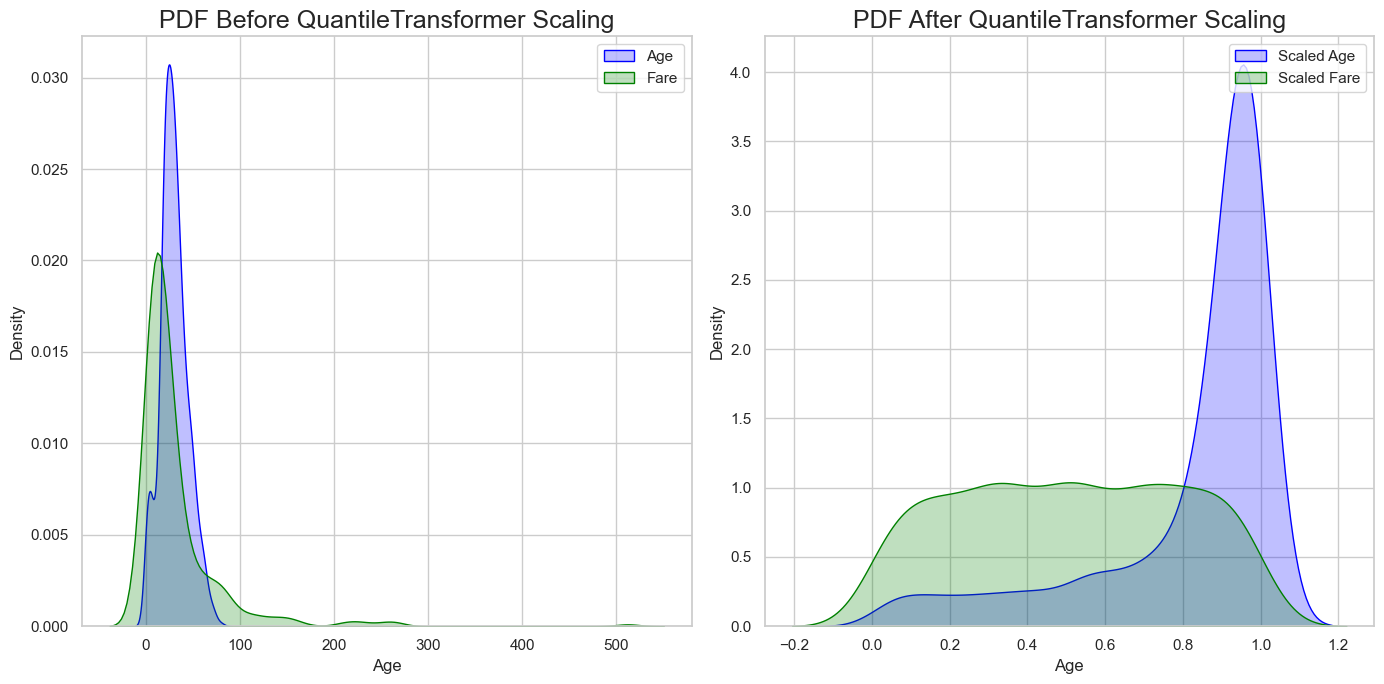

In [45]:
plt.figure(figsize=(14,7))
plt.subplot(1, 2, 1)
plt.title("PDF Before QuantileTransformer Scaling", fontsize=18)
sns.kdeplot(df['Age'], color="blue", label="Age", shade=True)
sns.kdeplot(df['Fare'], color="green", label="Fare", shade=True)
plt.legend()
plt.subplot(1, 2, 2)
plt.title("PDF After QuantileTransformer Scaling", fontsize=18)
sns.kdeplot(scaled_df['Age'], color="blue", label="Scaled Age", shade=True)
sns.kdeplot(scaled_df['Fare'], color="green", label="Scaled Fare", shade=True)
plt.legend()
plt.tight_layout()
plt.show()